# **INTRODUCTION**

The algorithm I have used is Linear Regression

To learn about Linear Regression and other ML models [Click here](https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf)

### **Libraries used**
[Numpy](https://numpy.org/)

[pandas](https://pandas.pydata.org/)

[Matplotlib](https://matplotlib.org/)

[seaborn](https://seaborn.pydata.org/)

[Sci-kit learn](https://scikit-learn.org/stable/)

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## **DATASET**

The Dataset: [California_housing_dataset](https://docs.google.com/spreadsheets/d/1TNKo5ErWyx0dqfVuoZrS2_o9Kch4vlfUI8pC4PdhfcQ/edit#gid=703407909)

(I found this dataset through google colab sample datasets)

## **DATA COLLECTION AND CLEANING**

In [ ]:
#Acquring the dataset
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
#First 5 rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
#Last 5 rows of the dataset
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
16995,False,False,False,False,False,False,False,False,False
16996,False,False,False,False,False,False,False,False,False
16997,False,False,False,False,False,False,False,False,False
16998,False,False,False,False,False,False,False,False,False


In [ ]:
#Checking if there are any null values in the dataset or not
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


## **EXPLORATORY DATA ANALYSIS**

## **Summary statistics**

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## **Visual plots of each feature**

<Axes: xlabel='total_rooms'>

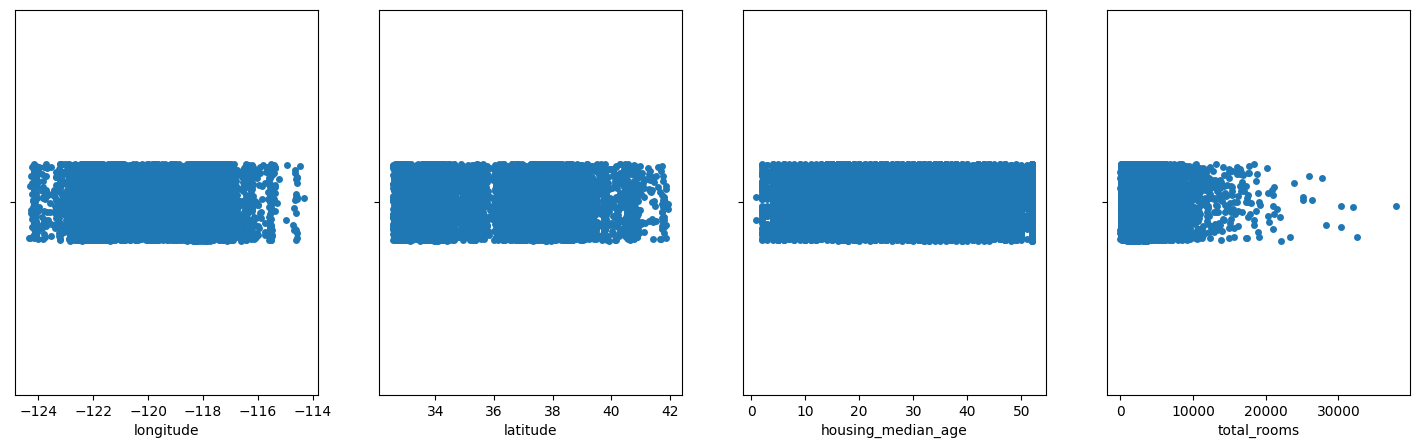

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (18, 5))

sns.stripplot(x = 'longitude', data = df,  ax = axes[0])
sns.stripplot(x = 'latitude', data = df,  ax = axes[1])
sns.stripplot(x = 'housing_median_age', data = df,  ax = axes[2])
sns.stripplot(x = 'total_rooms', data = df,  ax = axes[3])

<Axes: xlabel='median_income'>

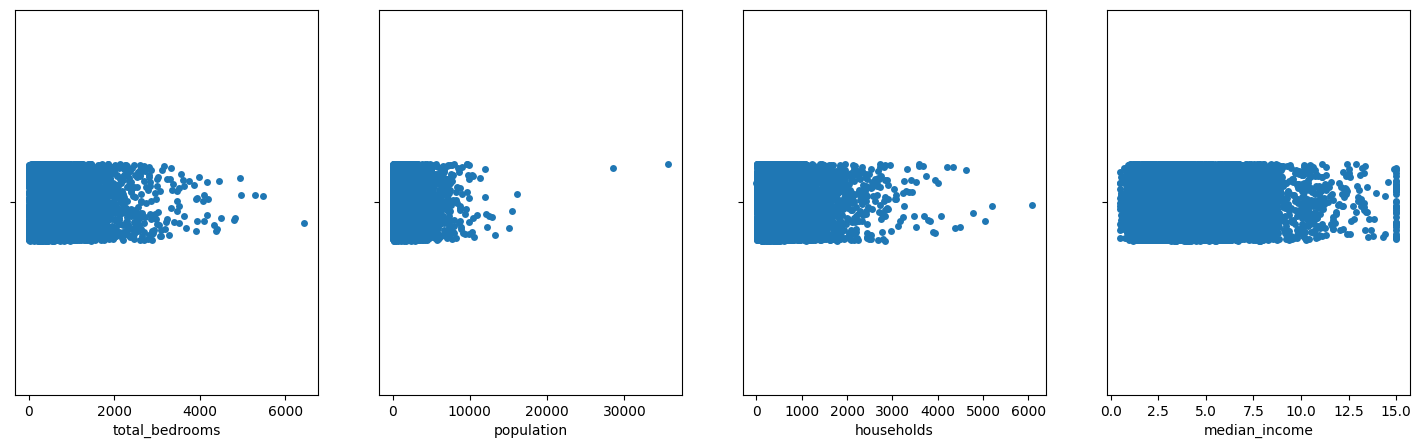

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (18, 5))

sns.stripplot(x = 'total_bedrooms', data = df,  ax = axes[0])
sns.stripplot(x = 'population', data = df,  ax = axes[1])
sns.stripplot(x = 'households', data = df,  ax = axes[2])
sns.stripplot(x = 'median_income', data = df,  ax = axes[3])

<Axes: xlabel='total_rooms', ylabel='Count'>

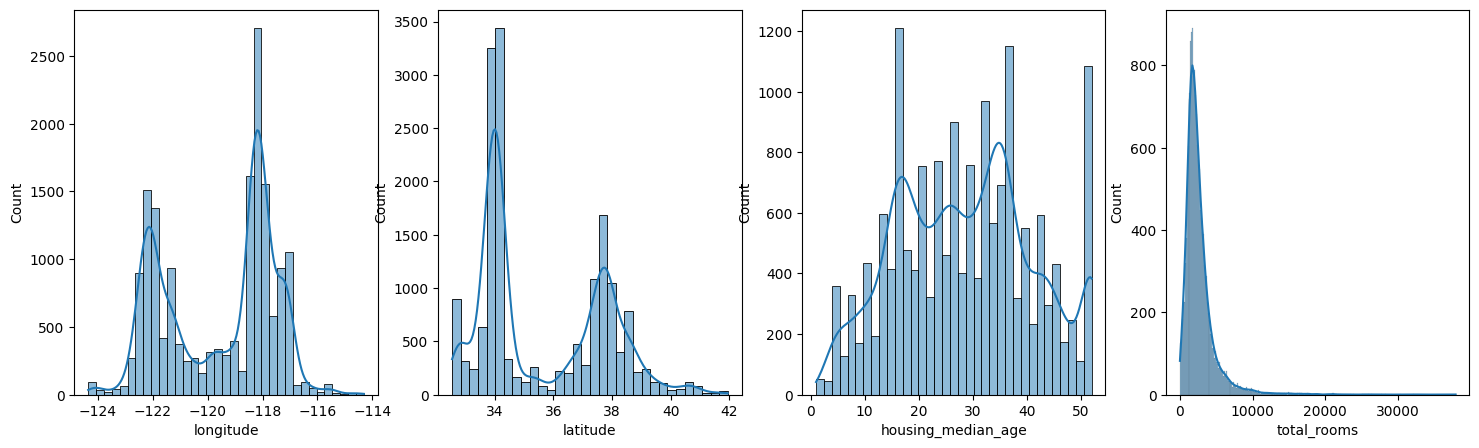

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (18, 5))

sns.histplot(x = 'longitude', data = df,  ax = axes[0], kde = True)
sns.histplot(x = 'latitude', data = df,  ax = axes[1], kde = True)
sns.histplot(x = 'housing_median_age', data = df,  ax = axes[2], kde = True)
sns.histplot(x = 'total_rooms', data = df,  ax = axes[3], kde = True)


<Axes: xlabel='median_income', ylabel='Count'>

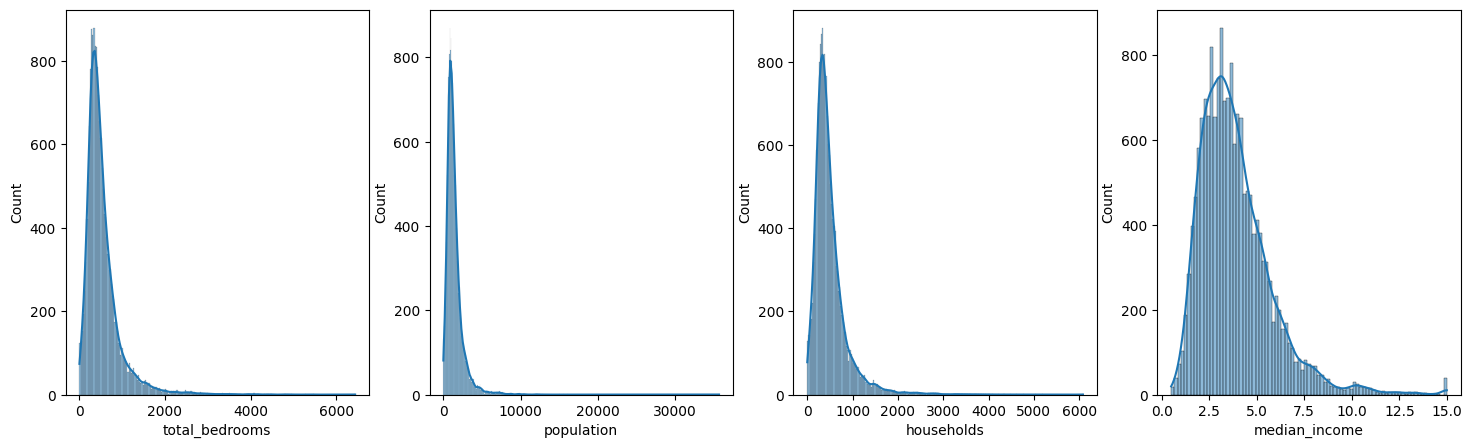

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (18, 5))

sns.histplot(x = 'total_bedrooms', data = df,  ax = axes[0], kde = True)
sns.histplot(x = 'population', data = df,  ax = axes[1], kde = True)
sns.histplot(x = 'households', data = df,  ax = axes[2], kde = True)
sns.histplot(x = 'median_income', data = df,  ax = axes[3], kde = True)

By visualizing the distributioon plots we can see the features : total_rooms, total_bedrooms, population, households and median_income are left skewed.

<Axes: xlabel='total_rooms'>

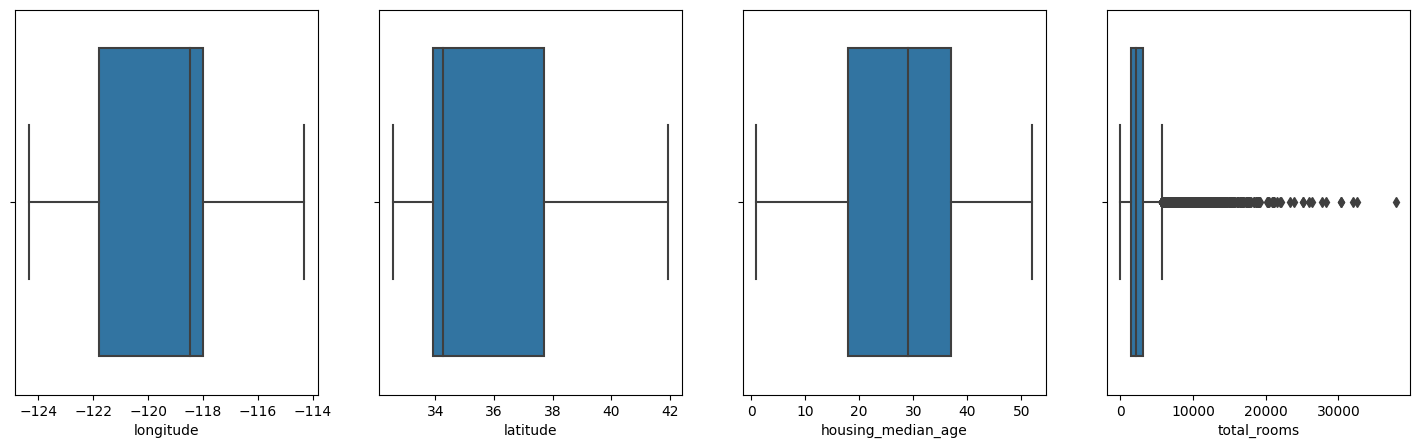

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (18, 5))

sns.boxplot(x = 'longitude', data = df,  ax = axes[0])
sns.boxplot(x = 'latitude', data = df,  ax = axes[1])
sns.boxplot(x = 'housing_median_age', data = df,  ax = axes[2])
sns.boxplot(x = 'total_rooms', data = df,  ax = axes[3])


<Axes: xlabel='median_income'>

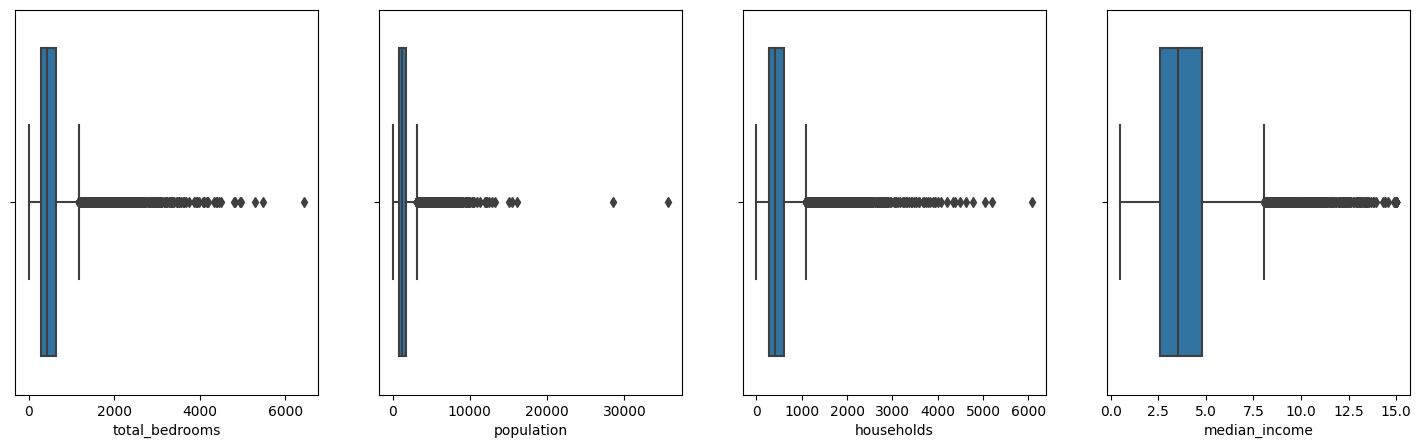

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (18, 5))

sns.boxplot(x = 'total_bedrooms', data = df,  ax = axes[0])
sns.boxplot(x = 'population', data = df,  ax = axes[1])
sns.boxplot(x = 'households', data = df,  ax = axes[2])
sns.boxplot(x = 'median_income', data = df,  ax = axes[3])

By visualizing the boxplots, we can see the large number of outliers on 5 of the 8 input features.

### **REMOVAL OF OUTLIERS**

We will be using the IQR method to remove the outliers since the distribution of features is skewed, hence we shall not use the z-score method.

In [ ]:
df.shape

(17000, 9)

In [ ]:
#Calculating the 25th percentile of
df.quantile(q=0.25, axis = 0)

longitude               -121.790000
latitude                  33.930000
housing_median_age        18.000000
total_rooms             1462.000000
total_bedrooms           297.000000
population               790.000000
households               282.000000
median_income              2.566375
median_house_value    119400.000000
Name: 0.25, dtype: float64

In [ ]:
#calculating the 75th percentile or 3rd quartile
df.quantile(q=0.75, axis = 0)

longitude               -118.000
latitude                  37.720
housing_median_age        37.000
total_rooms             3151.250
total_bedrooms           648.250
population              1721.000
households               605.250
median_income              4.767
median_house_value    265000.000
Name: 0.75, dtype: float64

In [ ]:
#Defining the IQR ranges
q1 = 1462.000000
Q1 = 3151.250

q2 = 297.000
Q2 = 648.000

q3 = 790.000
Q3 = 1721.000

q4 = 282.00
Q4 = 605.25

q5 = 2.566375
Q5 = 4.767

In [ ]:
iqr1 = Q1 - q1
iqr2 = Q2 - q2
iqr3 = Q3 - q3
iqr4 = Q4 - q4
iqr5 = Q5 - q5


In [ ]:
#Defining the upperlimit of the features using IQR
u1 = Q1 + 1.5*iqr1
u2 = Q2 + 1.5*iqr2
u3 = Q3 + 1.5*iqr3
u4 = Q4 + 1.5*iqr4
u5 = Q5 + 1.5*iqr5

In [ ]:
#Capping the outliers using the iqr method
df['total_rooms'] = np.where(df['total_rooms']>u1, u1, df['total_rooms'])
df['total_bedrooms'] = np.where(df['total_bedrooms']>u2, u2, df['total_bedrooms'])
df['population'] = np.where(df['population']>u3, u3, df['population'])
df['households'] = np.where(df['households']>u4, u4, df['households'])
df['median_income'] = np.where(df['median_income']>u5, u5, df['median_income'])

In [ ]:
#code for trimming the outliers from the different features
'''df = df.drop(df[df.total_rooms>u1].index)
df = df.drop(df[df.total_bedrooms>u2].index)
df = df.drop(df[df.population>u3].index)
df = df.drop(df[df.households>u4].index)
df = df.drop(df[df.median_income>u5].index)'''

'df = df.drop(df[df.total_rooms>u1].index)\ndf = df.drop(df[df.total_bedrooms>u2].index)\ndf = df.drop(df[df.population>u3].index)\ndf = df.drop(df[df.households>u4].index)\ndf = df.drop(df[df.median_income>u5].index)'

<Axes: xlabel='median_income'>

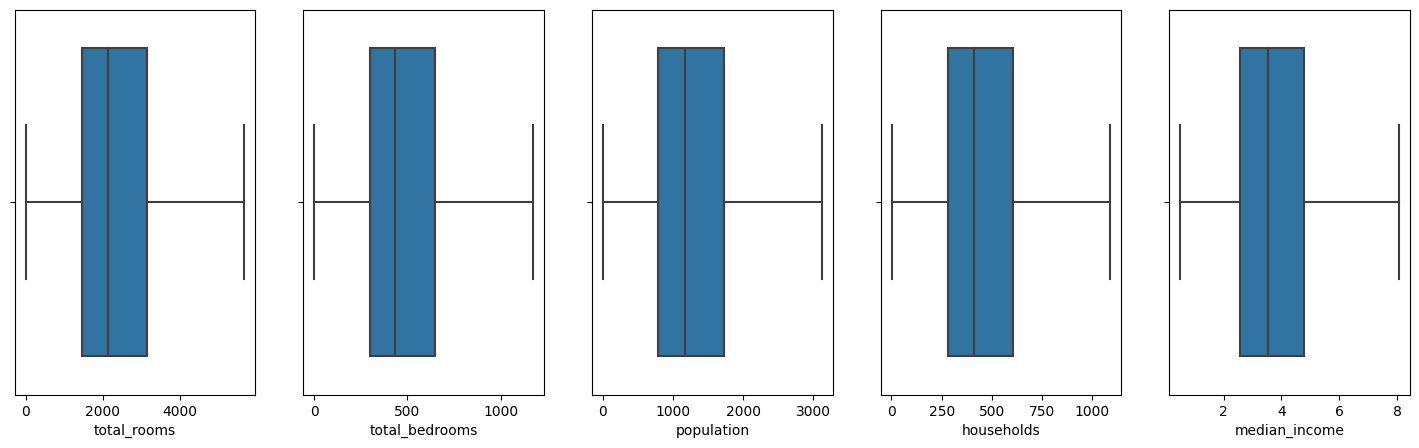

In [ ]:
#Visualizing the outliers using Boxplots
fig, axes = plt.subplots(1,5, figsize = (18, 5))

sns.boxplot(x = 'total_rooms', data = df,  ax = axes[0])
sns.boxplot(x = 'total_bedrooms', data = df,  ax = axes[1])
sns.boxplot(x = 'population', data = df,  ax = axes[2])
sns.boxplot(x = 'households', data = df,  ax = axes[3])
sns.boxplot(x = 'median_income', data = df,  ax = axes[4])

In [ ]:
#Evaluating the correlation between different features in the dataset
corr = df.corr()

<Axes: >

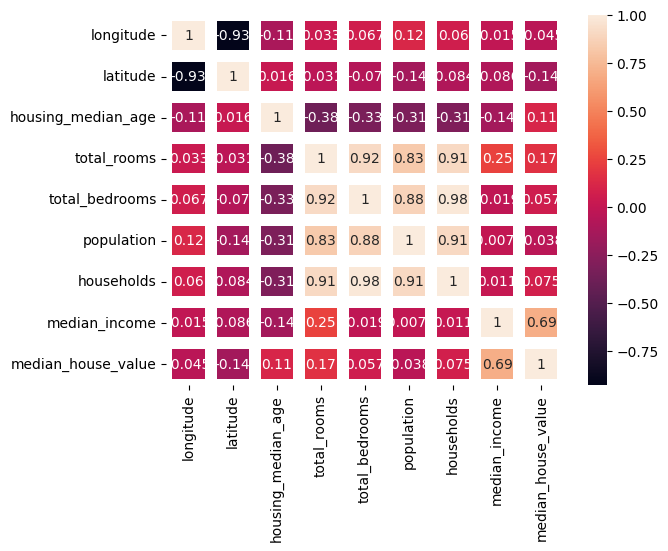

In [ ]:
sns.heatmap(df.corr(), annot= True, linewidth = 7.5)

In [ ]:
#Scatterplots between different feaures to understand the relationship
sns.pairplot(df)

# **MODEL DEVELOPEMENT**

## **Feature Selection on the basis of pearson corrrelation coefficient**

In [ ]:
#Defining the threshold for feature selection
def corrlation(df, threshold):
  colcorr = set()
  for i in range(len(corr.columns)):
    for j in range(i):
      if(abs(corr.iloc[i,j])>threshold):
        colname = corr.columns[i]
        colcorr.add(colname)

  return colcorr

In [ ]:
#Threshold is 0.5 (generally it is taken between 05-0.7)
corrlation(df, 0.5)

{'households',
 'latitude',
 'median_house_value',
 'population',
 'total_bedrooms'}

In [ ]:
df1 = df.copy()

In [ ]:
#Droppping the highly correalted features
df = df.drop(['households',
 'latitude',

 'population',
 'total_bedrooms'], axis = 1)

In [ ]:
df.reset_index()
df

,longitude,housing_median_age,total_rooms,median_income,median_house_value
0,-114.31,15.0,5612.000,1.4936,66900.0
1,-114.47,19.0,5685.125,1.8200,80100.0
2,-114.56,17.0,720.000,1.6509,85700.0
3,-114.57,14.0,1501.000,3.1917,73400.0
4,-114.57,20.0,1454.000,1.9250,65500.0
...,...,...,...,...,...
16995,-124.26,52.0,2217.000,2.3571,111400.0
16996,-124.27,36.0,2349.000,2.5179,79000.0
16997,-124.30,17.0,2677.000,3.0313,103600.0
16998,-124.30,19.0,2672.000,1.9797,85800.0


## **Model Developement using selected features**

Feature scaling is an important step espeially for the algorithms that are based on the concept of gradient descent.

In [ ]:
#Scaling the feaures
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scl_df = pd.DataFrame(scaled_data, columns = df.columns)

scl_df

,longitude,housing_median_age,total_rooms,median_income,median_house_value
0,1.000000,0.274510,0.987133,0.131302,0.107012
1,0.984064,0.352941,1.000000,0.174431,0.134228
2,0.975100,0.313725,0.126339,0.152087,0.145775
3,0.974104,0.254902,0.263763,0.355680,0.120414
4,0.974104,0.372549,0.255493,0.188305,0.104125
...,...,...,...,...,...
16995,0.008964,1.000000,0.389750,0.245400,0.198764
16996,0.007968,0.686275,0.412977,0.266648,0.131960
16997,0.004980,0.313725,0.470692,0.334486,0.182682
16998,0.004980,0.352941,0.469812,0.195533,0.145981


In [ ]:
#Seperating target variables
x = scl_df.drop(['median_house_value'], axis =1)
y = scl_df['median_house_value']

In [ ]:
#Splitting the train and test dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

In [ ]:
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = LinReg.predict(x_test)
print(y_pred)

[0.18329733 0.3737265  0.2881384  ... 0.77714899 0.35044546 0.38027782]


In [ ]:
actual_pred = pd.DataFrame({"Actual_values":y_test, "Predicted_values":y_pred})
actual_pred.sample(10)

,Actual_values,Predicted_values
8427,0.823298,0.398231
14911,1.000000,0.920152
13291,0.311341,0.521280
10083,0.546804,0.515894
14829,0.175259,0.283402
13210,0.407217,0.347694
9855,0.125569,0.191441
13166,0.479175,0.481265
8698,1.000000,0.837000
9570,0.152373,0.206875


In [ ]:
print("The model score is: ", LinReg.score(x,y)*100)

The model score is:  52.828755733992516


In [ ]:
#Evaluating the model using r2 score and mean absolute error
from sklearn.metrics import r2_score, mean_absolute_error
print("The r2 score is: ",r2_score(y_test, y_pred))
print("The Mean absolute error is : ", mean_absolute_error(y_test, y_pred))

The r2 score is:  0.5259998052931701
The Mean absolute error is :  0.12286924718507974


## **Without Dropping the highly correlated features**

In [ ]:
#Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1)
scl_df1 = pd.DataFrame(scaled_data, columns = df1.columns)

scl_df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.987133,1.000000,0.324932,0.432457,0.131302,0.107012
1,0.984064,0.197662,0.352941,1.000000,1.000000,0.361535,0.424194,0.174431,0.134228
2,0.975100,0.122210,0.313725,0.126339,0.147422,0.105956,0.106508,0.152087,0.145775
3,0.974104,0.116897,0.254902,0.263763,0.286323,0.164392,0.206588,0.355680,0.120414
4,0.974104,0.109458,0.372549,0.255493,0.276949,0.199390,0.239642,0.188305,0.104125
...,...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.389750,0.334896,0.290255,0.337886,0.245400,0.198764
16996,0.007968,0.866100,0.686275,0.412977,0.449084,0.382405,0.426030,0.266648,0.131960
16997,0.004980,0.988310,0.313725,0.470692,0.451640,0.398459,0.417767,0.334486,0.182682
16998,0.004980,0.984060,0.352941,0.469812,0.469536,0.415797,0.437966,0.195533,0.145981


In [ ]:
#Splitting the Target variable
x1 = scl_df1.drop(['median_house_value'], axis = 1)
y1 = scl_df1['median_house_value']

In [ ]:
#Developing the model when considering all the features within the dataset
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.25, random_state = 100)

LinReg.fit(x1_train, y1_train)

LinearRegression()

In [ ]:
#Predicting the values
y1_pred = LinReg.predict(x1_test)

In [ ]:
#predicted values
print(y1_pred)

[0.17615615 0.34630557 0.08284218 ... 0.80203372 0.2530039  0.43611539]


In [ ]:
#comparing the actual and predicted values by this model
actual_pred1 = pd.DataFrame({"Actual_values":y1_test, "Predicted_values":y1_pred})
actual_pred1.sample(10)

,Actual_values,Predicted_values
15547,0.553196,0.552940
6867,0.343093,0.423102
6999,0.329898,0.327116
5468,0.337320,0.528465
5378,0.300826,0.190228
6162,0.466598,0.620430
4534,0.297320,0.193011
2357,0.264743,0.350508
3612,0.188249,0.692769
5602,1.000000,0.835700


In [ ]:
#Evaluating the model using r2 score and mean absolute error
print("The new model score is: ", LinReg.score(x1, y1)*100)
print("The r2 score of this model is: ",r2_score(y1_test, y1_pred))
print("The mean absolute error of this model is : ", mean_absolute_error(y1_test, y1_pred))

The new model score is:  66.42717661950918
The r2 score of this model is:  0.6661882020407022
The mean absolute error of this model is :  0.10247123461621324


## **Using Mutual Info gain feaure selection**

In [ ]:
#implementation of mutual info gain feature selection method
from sklearn.feature_selection import mutual_info_regression
m = mutual_info_regression(x1,y1)
m

array([0.40230028, 0.36804865, 0.04126962, 0.03124135, 0.0167398 ,
       0.01944513, 0.0251214 , 0.38576449])

In [ ]:
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

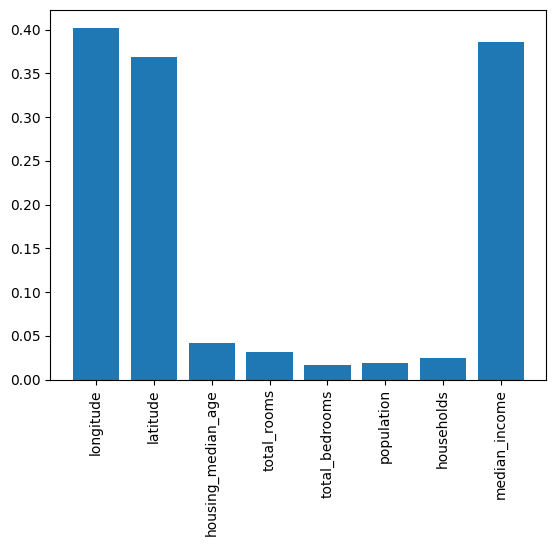

In [ ]:
#graphical visualisation to checkout the relevant features
c = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
m = list(m)

plt.bar(c,m)
plt.xticks(rotation = 90)

plt.show()

In [ ]:
scl_df1 =scl_df1.drop(['housing_median_age',  'total_bedrooms', 'total_rooms', 'population', 'households'], axis =1)

In [ ]:
#model depolyement according to the above feature selection method
x2 = scl_df1.drop(['median_house_value'], axis =1)
y2 = scl_df1['median_house_value']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.25, random_state = 100)

LinReg.fit(x2_train, y2_train)

LinearRegression()

In [ ]:
#predicting values
y2_pred = LinReg.predict(x2_test)

In [ ]:
print(y2_pred)

[0.23138318 0.35230094 0.06055214 ... 0.75259632 0.26455808 0.45777261]


In [ ]:
#model score and evaluating model's perfromance
print("The model score using mutual gain feature selection method: ",LinReg.score(x2,y2)*100)
print("The r2 score of this model is: ", r2_score(y2_test, y2_pred))
print("The mean absoolute error  of this model is: ", mean_absolute_error(y2_test, y2_pred))

The model score using mutual gain feature selection method:  58.505154994566745
The r2 score of this model is:  0.590276000788875
The mean absoolute error  of this model is:  0.1131305775269026


In [ ]:
#comparison of actual and predicted values by this model
actual_pred1 = pd.DataFrame({"Actual_values":y2_test, "Predicted_values":y2_pred})
actual_pred1.sample(10)

,Actual_values,Predicted_values
15140,0.355671,0.202941
328,0.312784,0.299735
11505,0.527010,0.343408
5549,0.290723,0.324448
5965,0.309485,0.256064
16033,0.515464,0.448262
4112,0.438145,0.562058
8894,0.664948,0.816669
965,0.180414,0.284320
9859,0.761648,0.679921
